In [1]:
import numpy as np
import os
os.chdir('/home/ia404/gitreps/dustbias/mbatch/')
import argparse
from utils import get_auto_name, bandedcls
from orphics import stats
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from matplotlib import rcParams
rcParams['font.size']=20
rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1
rcParams['xtick.major.pad']='8'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
rcParams['ytick.right'] = True
rcParams['text.usetex'] = True
rcParams['font.family'] = 'Helvetica'

path = '/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/mbatch_lmin/stage_auto/'
data_path = lambda x: os.path.join(path, x)

%matplotlib inline

--------------------------------------------------------------------------

  Local host:   login-q-1
  Local device: mlx5_0
--------------------------------------------------------------------------


In [2]:
args = argparse.Namespace()

In [3]:
args.filter_whiteamplitude = 12.
args.filter_whitefwhm = 1.4
args.lmax = 3000
args.mlmax = 4000
args.est = 'TT'
args.dust_freq = 95.
args.mask_subproduct = 'lensing_masks'
args.mask_type = 'wide_v4_20220316'
args.apodfact = '3dg'
args.config_name = 'act_dr6v4'

In [4]:
# signal
lk, clkk=np.loadtxt('/rds/project/dirac_vol5/rds-dirac-dp002/ia404/sslp/extra/clkk_raw_plikHM_TTTEEE_lowl_lowE_dr6_accuracy.txt',unpack=True)
clpp = clkk * 4 / (lk * (lk+1))**2

/tmp/ipykernel_3152417/621840297.py:3: RuntimeWarning: invalid value encountered in divide
  clpp = clkk * 4 / (lk * (lk+1))**2


In [5]:
ell_arr = np.arange(args.mlmax+1)
lfac =  (ell_arr * (ell_arr + 1))**2 / (2 * np.pi)
lcut = 500
nbands = 100
lbands = np.concatenate((np.linspace(2, lcut)[:-1], np.logspace(np.log10(lcut), np.log10(args.lmax), nbands+1)))#  dtype=int)

In [31]:
dict_plot = {}
dict_plot['GAL040'] = {'linestyle': 'dotted', 'label': 'ACT 40\%'}
dict_plot['GAL060'] = {'linestyle': 'dashed', 'label': 'ACT 60\%'}
dict_plot['GAL070'] = {'linestyle': 'solid', 'label': 'ACT 70\%'}

dict_plot['lmin10'] = {'linestyle': 'dotted', 'label': r'$\ell_{\textrm{min}} = 10$'}
dict_plot['lmin200'] = {'linestyle': 'dashed', 'label': r'$\ell_{\textrm{min}} = 200$'}
dict_plot['lmin600'] = {'linestyle': 'solid', 'label': r'$\ell_{\textrm{min}} = 600$'}

dict_plot['pysm_d1'] = {'color': 'gold', 'label': 'PySM d1'}
dict_plot['pysm_d6'] = {'color': 'cornflowerblue', 'label': 'PySM d6'}
dict_plot['pysm_d10'] = {'color': 'crimson', 'label': 'PySM d10'}


In [29]:
FG_TYPES = ['pysm_d1', 'pysm_d6', 'pysm_d10']
GALS = ['GAL040', 'GAL060', 'GAL070']
LMINS = [10, 200, 600]

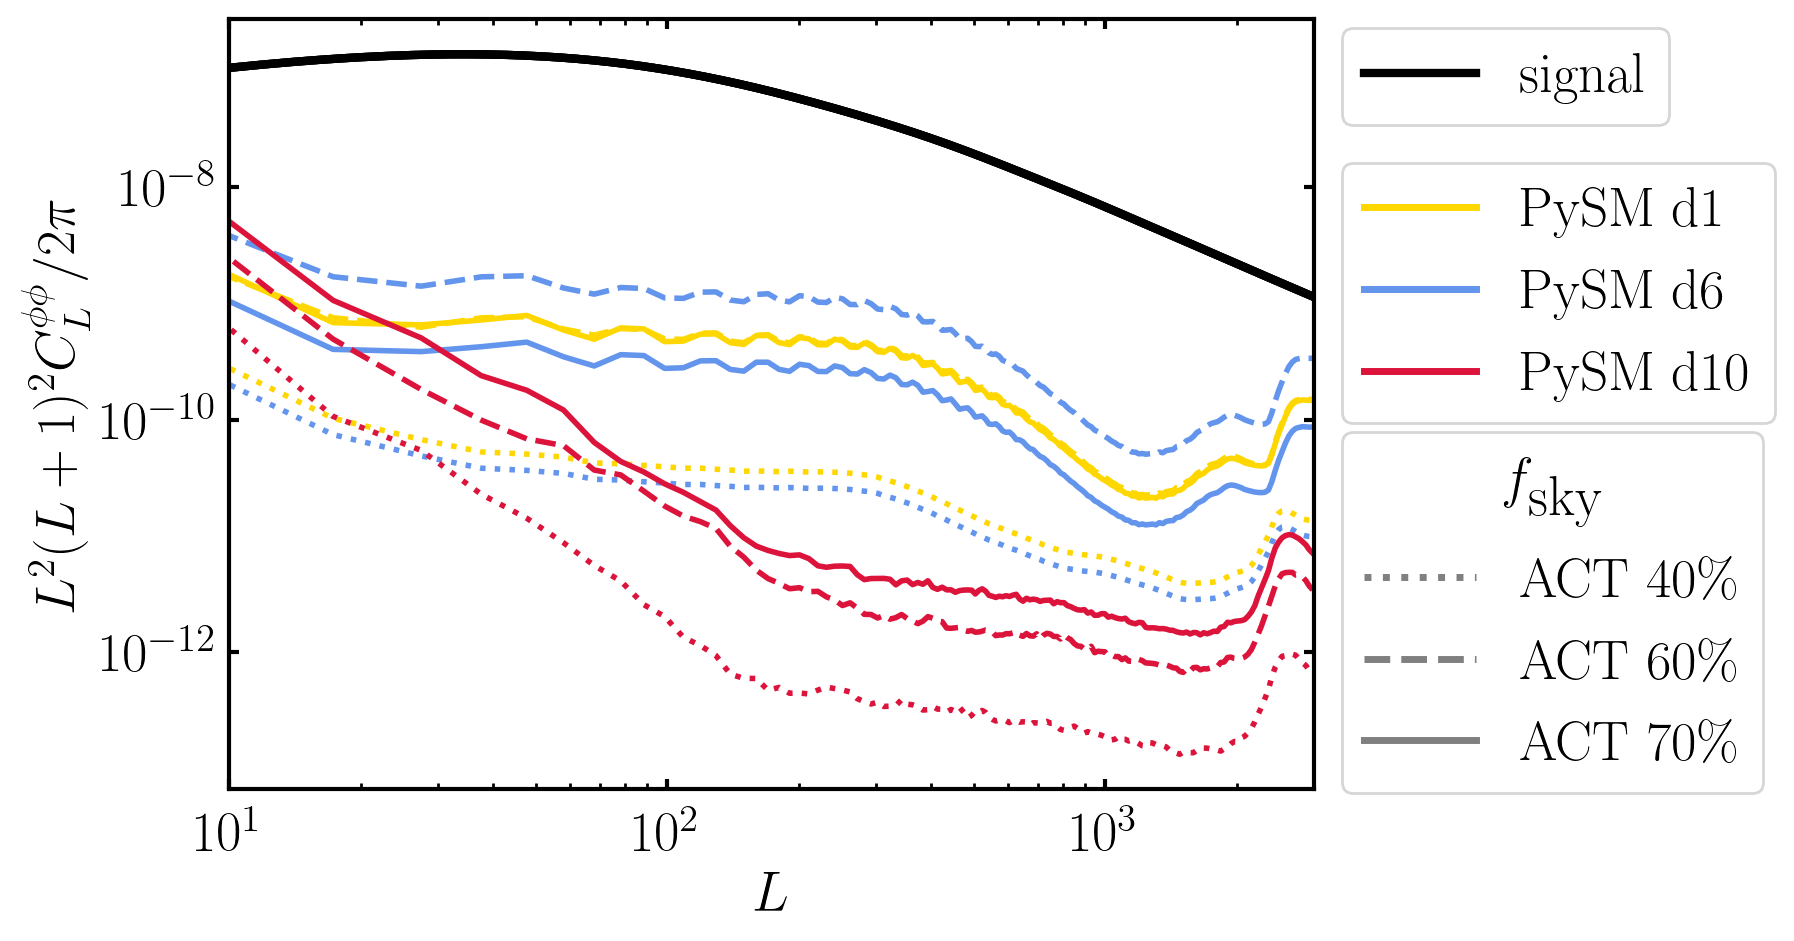

In [27]:
args.lmin = 600
fig, ax = plt.subplots(1, 1, figsize=(7,5), dpi = 200)

for dust_types in FG_TYPES:
    args.dust_type = dust_types
    for fsky in GALS:
        args.skyfrac = fsky

        oname = get_auto_name(args)
        cl = np.loadtxt(data_path(oname))

        bin_ell, bin_cell = bandedcls(cl * lfac, lbands)
        ax.loglog(bin_ell, bin_cell, linewidth = 2, linestyle = dict_plot[fsky]['linestyle'], color = dict_plot[dust_types]['color'])

    ax.loglog(ell_arr[2:], (clpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3)
    ax.set_xlim(10, 3000)

custom_lines = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in FG_TYPES]
legend1 = ax.legend(custom_lines, [dict_plot[fg_type]['label'] for fg_type in FG_TYPES], bbox_to_anchor=(1, 0.85), loc = 'upper left')
plt.gca().add_artist(legend1)

custom_lines = [Line2D([0], [0], color='gray', linestyle = dict_plot[GAL]['linestyle'], lw=2.5) for GAL in GALS]

legend2 = ax.legend(custom_lines, [dict_plot[GAL]['label'] for GAL in GALS], bbox_to_anchor=(1, 0.5), loc = 'upper left', title = r'$f_\textrm{sky}$')
plt.gca().add_artist(legend2)

custom_lines = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
legend3 = ax.legend(custom_lines, ['signal'], bbox_to_anchor=(1, 1.025), loc = 'upper left') # (1, 1.025)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$') 
plt.show()

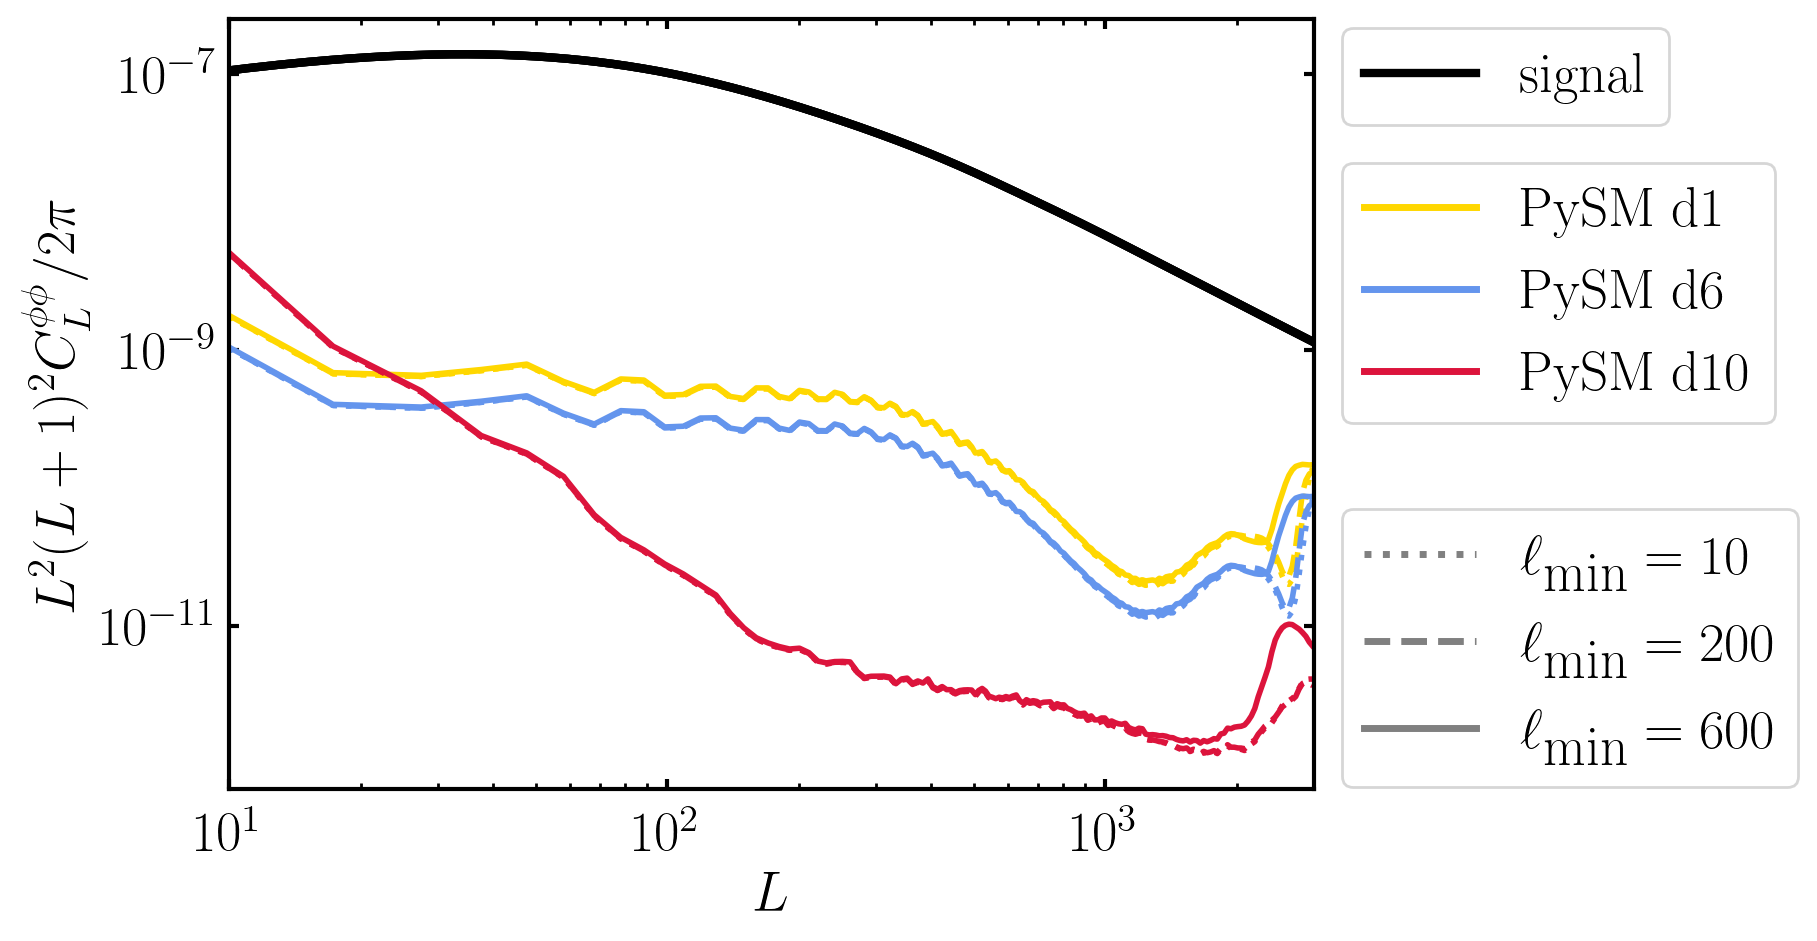

In [36]:
args.skyfrac = 'GAL070'
fig, ax = plt.subplots(1, 1, figsize=(7,5), dpi = 200)

for dust_types in FG_TYPES:
    args.dust_type = dust_types
    for lmin in LMINS:
        args.lmin = lmin

        oname = get_auto_name(args)
        cl = np.loadtxt(data_path(oname))

        bin_ell, bin_cell = bandedcls(cl * lfac, lbands)
        ax.loglog(bin_ell, bin_cell, linewidth = 2, linestyle = dict_plot[f'lmin{lmin}']['linestyle'], color = dict_plot[dust_types]['color'])

    ax.loglog(ell_arr[2:], (clpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3)
    ax.set_xlim(10, 3000)

custom_lines = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in FG_TYPES]
legend1 = ax.legend(custom_lines, [dict_plot[fg_type]['label'] for fg_type in FG_TYPES], bbox_to_anchor=(1, 0.85), loc = 'upper left')
plt.gca().add_artist(legend1)

custom_lines = [Line2D([0], [0], color='gray', linestyle = dict_plot[f'lmin{lmin}']['linestyle'], lw=2.5) for lmin in LMINS]

legend2 = ax.legend(custom_lines, [dict_plot[f'lmin{lmin}']['label'] for lmin in LMINS], bbox_to_anchor=(1, 0.40), loc = 'upper left') #, title = r'$\ell_\textrm{min}$')
plt.gca().add_artist(legend2)

custom_lines = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
legend3 = ax.legend(custom_lines, ['signal'], bbox_to_anchor=(1, 1.025), loc = 'upper left') # (1, 1.025)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$') 
plt.show()